In [29]:
# INF2178 Assignment 3
# Name: Yuyang Liu
# Student ID: 1005965617

In [30]:
# Import relevant data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install pingouin

# Import the data file
df=pd.read_csv("INF2178_A3_data.csv")
df.head(5)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [31]:
# Before start, check to see if there are null values need to be addressed
df.isnull().sum()

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [32]:
# Add new columns for score change across time
df['readingscorediff'] = df['springreadingscore'] - df['fallreadingscore']
df['mathscorediff'] = df['springmathscore'] - df['fallmathscore']
df.head(5)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,readingscorediff,mathscorediff
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,0.86,3.95


In [33]:
# Conduct a summary statistics to have an overview of the useful columns
selected_col = ['fallgeneralknowledgescore', 'fallreadingscore', 'fallmathscore', 'springreadingscore', 'springmathscore', 'readingscorediff', 'mathscorediff']
selected_df = df[selected_col]
summary_stats = selected_df.describe()
summary_stats

,fallgeneralknowledgescore,fallreadingscore,fallmathscore,springreadingscore,springmathscore,readingscorediff,mathscorediff
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,23.073694,35.954215,27.128244,47.511178,37.799461,11.556963,10.671218
std,7.396978,10.473130,9.120505,14.327111,12.027753,8.085004,6.855263
min,6.985000,21.010000,10.510000,22.350000,11.900000,-44.760000,-22.160000
25%,17.385000,29.340000,20.680000,38.950000,29.270000,6.470000,6.010000
50%,22.954000,34.060000,25.680000,45.320000,36.410000,10.400000,9.860000
75%,28.305000,39.890000,31.590000,51.770000,44.220000,15.150000,14.330000
max,47.691000,138.510000,115.650000,156.850000,113.800000,91.940000,75.350000


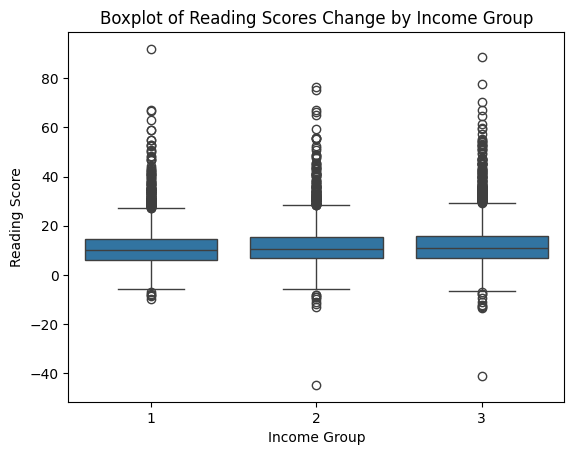

In [34]:
# Create boxplot to view data distribution for reading score change
sns.boxplot(x='incomegroup', y='readingscorediff', data=df)
plt.title('Boxplot of Reading Scores Change by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Reading Score')
plt.show()

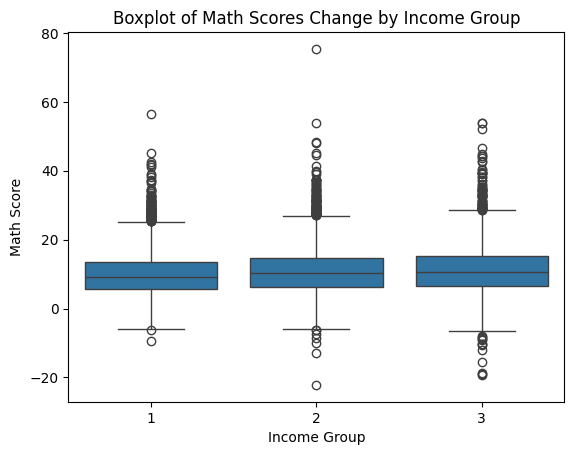

In [35]:
# Create boxplot to view data distribution for math score change
sns.boxplot(x='incomegroup', y='mathscorediff', data=df)
plt.title('Boxplot of Math Scores Change by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Math Score')
plt.show()

<ipython-input-36-c218d8534eb3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='readingscorediff', data=df, ci=None)


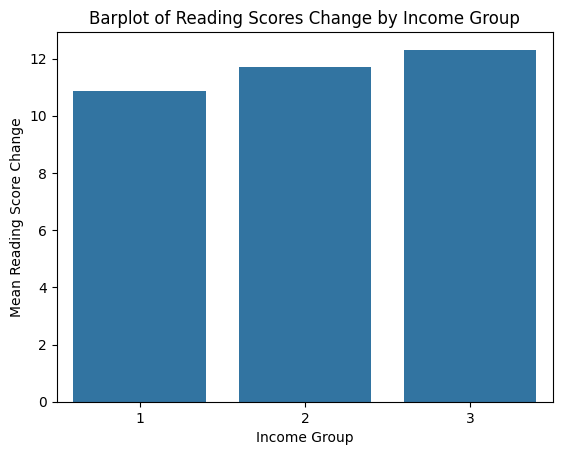

In [36]:
# Create barplot for reading score changes by income group
sns.barplot(x='incomegroup', y='readingscorediff', data=df, ci=None)
plt.title('Barplot of Reading Scores Change by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Reading Score Change')
plt.show()

<ipython-input-37-1b6b598d51a0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='mathscorediff', data=df, ci=None)


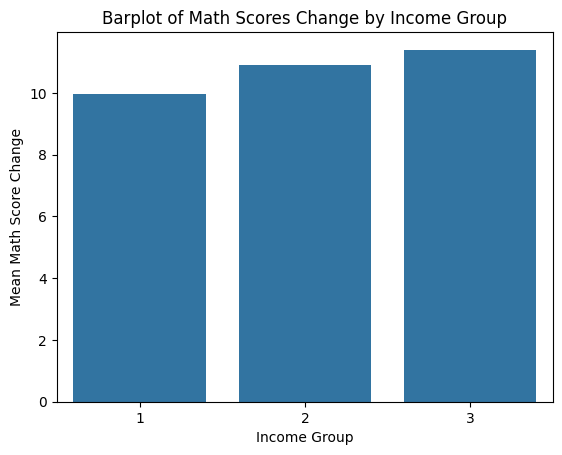

In [37]:
# Create barplot for math score changes by income group
sns.barplot(x='incomegroup', y='mathscorediff', data=df, ci=None)
plt.title('Barplot of Math Scores Change by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Math Score Change')
plt.show()

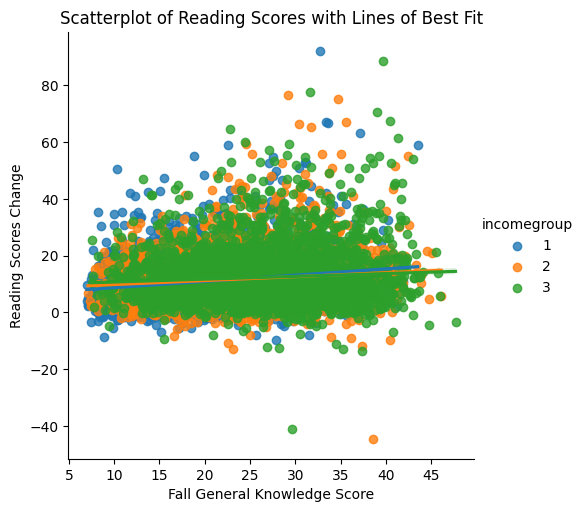

In [38]:
# Create a scatterplot to better understand the reading scores trend
sns.lmplot(x='fallgeneralknowledgescore', y='readingscorediff', data=df, hue='incomegroup')
plt.title('Scatterplot of Reading Scores with Lines of Best Fit')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Reading Scores Change')
plt.show()

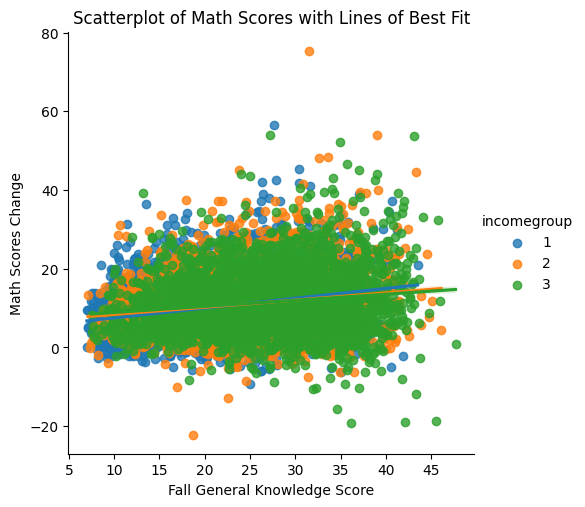

In [39]:
# Create a scatterplot to better understand the math scores trend
sns.lmplot(x='fallgeneralknowledgescore', y='mathscorediff', data=df, hue='incomegroup')
plt.title('Scatterplot of Math Scores with Lines of Best Fit')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Math Scores Change')
plt.show()

In [50]:
# Conduct ANCOVA test for the reading scores research question (1)
model_readingscore = ols('readingscorediff ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
print(model_readingscore.summary())
ancova_reading = sm.stats.anova_lm(model_readingscore, typ=2)
print(ancova_reading)

                            OLS Regression Results                            
Dep. Variable:       readingscorediff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     95.49
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                        01:16:22   Log-Likelihood:                -41730.
No. Observations:               11933   AIC:                         8.347e+04
Df Residuals:                   11929   BIC:                         8.350e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

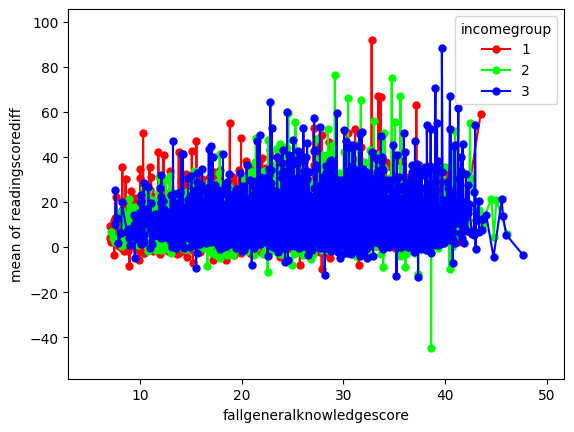

In [41]:
# Import interaction plot package
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Create interaction plot for reading scores
fig, ax = plt.subplots()
fig = interaction_plot(x=df['fallgeneralknowledgescore'], trace=df['incomegroup'], response=df['readingscorediff'],
                       ms=10, ax=plt.gca())

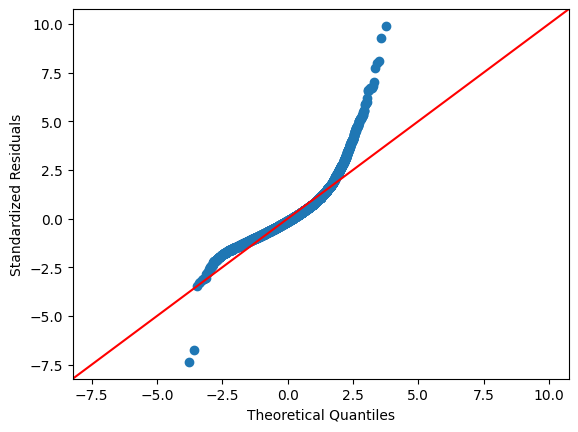

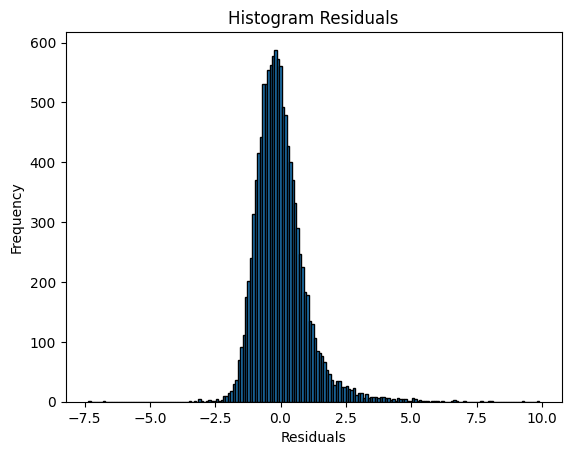

In [42]:
# Testing assumptions for the one-way ANCOVA
# Extract residuals
residuals_1 = model_readingscore.resid

# Standardize the residuals
standardized_residuals_1 = residuals_1 / residuals_1.std()

# Assumption 1: res.anova_std_residuals are standardized residuals
sm.qqplot(standardized_residuals_1, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(standardized_residuals_1, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram Residuals")
plt.show()

In [43]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_1)
print(w,pvalue)

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res = stat()
res.levene(df, res_var='readingscorediff', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),19.728
1,Degrees of freedom (Df),2.000
2,p value,0.000


In [51]:
# Conduct ANCOVA test for the math scores research question (2)
model_mathscore = ols('mathscorediff ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
print(model_mathscore.summary())
ancova_math = sm.stats.anova_lm(model_mathscore, typ=2)
print(ancova_math)

                            OLS Regression Results                            
Dep. Variable:          mathscorediff   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        01:29:08   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

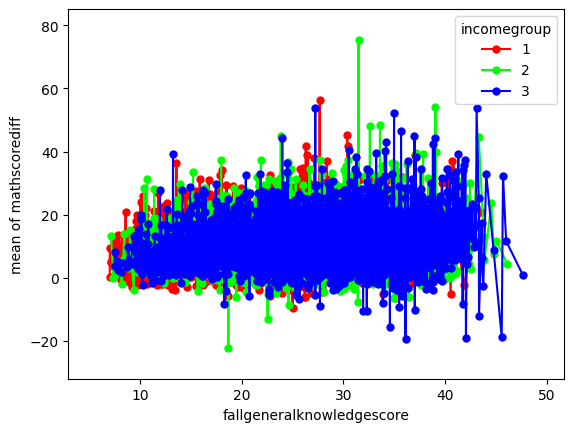

In [46]:
# Create interaction plot for math scores
fig, ax = plt.subplots()
fig = interaction_plot(x=df['fallgeneralknowledgescore'], trace=df['incomegroup'], response=df['mathscorediff'],
                       ms=10, ax=plt.gca())

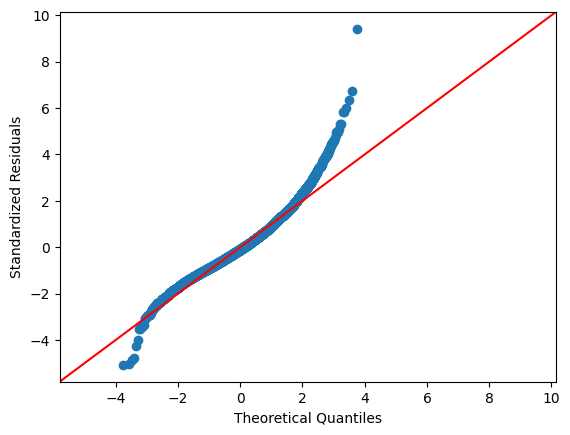

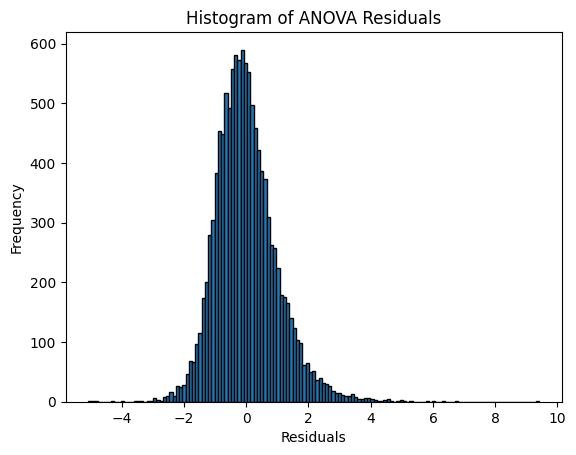

In [47]:
# Testing assumptions for the one-way ANCOVA
# Extract residuals
residuals_2 = model_mathscore.resid

# Standardize the residuals
standardized_residuals_2 = residuals_2 / residuals_2.std()

# Assumption 1: res.anova_std_residuals are standardized residuals
sm.qqplot(standardized_residuals_2, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(standardized_residuals_2, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

In [48]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_2)
print(w,pvalue)

0.9664044380187988 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res = stat()
res.levene(df, res_var='mathscorediff', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22.2152
1,Degrees of freedom (Df),2.0000
2,p value,0.0000
